In [205]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
pd.options.mode.chained_assignment = None

#pip install tensorflow

# Modelo de deep learning baseado no histórico recente (LSTM)

In [206]:
acao = "HGLG11.SA"

inicio = "2014-12-31"
final = "2022-10-07"

dados_acao = pdr.get_data_yahoo(acao, inicio, final)

dados_acao

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,109.099998,103.000000,107.000000,109.099998,500.0,101.408676
2015-01-05,113.699997,109.000000,110.000000,111.000000,2320.0,103.174721
2015-01-06,110.989998,110.000000,110.988998,110.000000,280.0,102.245224
2015-01-07,111.198997,108.000000,109.000000,109.000000,2460.0,101.315727
2015-01-08,109.999001,107.000000,109.999001,108.500000,1300.0,100.850967
...,...,...,...,...,...,...
2022-10-03,170.000000,167.149994,170.000000,167.500000,62455.0,167.500000
2022-10-04,167.449997,163.500000,167.419998,166.149994,97568.0,166.149994
2022-10-05,167.910004,165.100006,166.149994,167.029999,57944.0,167.029999


In [207]:
#nao pode ser ajustados

cotacao = dados_acao['Close'].to_numpy().reshape(-1, 1)

cotacao

array([[109.09999847],
       [111.        ],
       [110.        ],
       ...,
       [167.02999878],
       [168.22999573],
       [168.8500061 ]])

In [208]:
tamanho_dados_treinamento = int(len(cotacao) * 0.8)

tamanho_dados_treinamento

1545

In [209]:
#escalar os dados entre 0 e 1, para deixar mais fácil o processamento
#dados em escala pré definidas são mais fáceis de lidar. 

escalador = MinMaxScaler(feature_range=(0, 1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento: , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))
                                                

dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

In [210]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

#dados que serão usados para gerar o resultado
treinamento_x = []
#cotação que aconteceu de fato
treinamento_y = []


for i in range(60, len(dados_para_treinamento)):

    #60 ultimos dias
    treinamento_x.append(dados_para_treinamento[i - 60: i, 0])
    #cotacao
    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 61:

        print(treinamento_x)
        print(treinamento_y)



[array([0.16785501, 0.18196673, 0.17453951, 0.1671123 , 0.16339869,
       0.17453951, 0.1671123 , 0.17082591, 0.17156862, 0.17156862,
       0.17194   , 0.17156862, 0.1671123 , 0.16356212, 0.1671123 ,
       0.1671123 , 0.16339869, 0.1604278 , 0.15968509, 0.15225787,
       0.15225787, 0.13740345, 0.13339274, 0.11883541, 0.11511438,
       0.12774805, 0.12626263, 0.12626263, 0.12626263, 0.12997623,
       0.12997623, 0.12997623, 0.12997623, 0.12626263, 0.11957812,
       0.12626263, 0.12254902, 0.12254902, 0.12180631, 0.11511438,
       0.11512181, 0.11518125, 0.11512181, 0.11512181, 0.1143791 ,
       0.10770944, 0.10769459, 0.10762031, 0.09433301, 0.08318477,
       0.07798574, 0.10323828, 0.10620917, 0.1017528 , 0.10583779,
       0.09729648, 0.09729648, 0.10026738, 0.106172  , 0.10616458])]
[0.11215091014982603]
[array([0.16785501, 0.18196673, 0.17453951, 0.1671123 , 0.16339869,
       0.17453951, 0.1671123 , 0.17082591, 0.17156862, 0.17156862,
       0.17194   , 0.17156862, 0.167

In [211]:
#transformando as listas em arrays e dando reshape 3d 

treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

treinamento_x

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

treinamento_x

array([[[0.16785501],
        [0.18196673],
        [0.17453951],
        ...,
        [0.10026738],
        [0.106172  ],
        [0.10616458]],

       [[0.18196673],
        [0.17453951],
        [0.1671123 ],
        ...,
        [0.106172  ],
        [0.10616458],
        [0.11215091]],

       [[0.17453951],
        [0.1671123 ],
        [0.16339869],
        ...,
        [0.10616458],
        [0.11215091],
        [0.11512181]],

       ...,

       [[0.60680331],
        [0.61200233],
        [0.61281933],
        ...,
        [0.67052881],
        [0.66622101],
        [0.6587938 ]],

       [[0.61200233],
        [0.61281933],
        [0.62017231],
        ...,
        [0.66622101],
        [0.6587938 ],
        [0.63131313]],

       [[0.61281933],
        [0.62017231],
        [0.63383836],
        ...,
        [0.6587938 ],
        [0.63131313],
        [0.64616756]]])

In [212]:
#construindo o modelo

modelo = Sequential()

#vamos criar um modelo com 50 neurônios
#return sequences = True pois vamos usar outro LSTM depois.
#definir o shape, que no caso são 60 informações para gerar uma.
#Adicionar mais neurônios com o dense, 25 e 1
#Não se apegue a isso agora, é apenas um arquitetura de deep learning.

modelo.add(LSTM(100, return_sequences=True, input_shape = (treinamento_x.shape[1], 1)))
modelo.add(LSTM(100, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))


In [213]:
#copilando o modelo

# a função de loss é a forma de medir o erro do modelo, que nesse caso
#é o classico erro médio quadrático da que é usado em regressão linear
#otimizador e medida de erro

modelo.compile(optimizer="adam", loss="mean_squared_error") 

In [214]:
#agora com o modelo copilado e os dados, podemos treinar o modelo

modelo.fit(treinamento_x, treinamento_y, batch_size=1, epochs=1)

1485/1485 [==============================] - 83s 52ms/step - loss: 0.0022


In [215]:
#criar dados de teste

dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60:, :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: , :] 

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i - 60: i, 0])
    

In [216]:
#reshape
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [217]:
#pegando predições do modelo

predicoes = modelo.predict(teste_x)

#tirando a escala dos dados

predicoes = escalador.inverse_transform(predicoes)

predicoes

13/13 [==============================] - 2s 54ms/step


array([[172.35031],
       [171.879  ],
       [171.24713],
       [170.55347],
       [170.62225],
       [171.10216],
       [172.33553],
       [173.06488],
       [173.13889],
       [172.73468],
       [172.21808],
       [171.75467],
       [171.56776],
       [171.4879 ],
       [171.37172],
       [171.26318],
       [171.21367],
       [171.1964 ],
       [171.07336],
       [170.88953],
       [170.80824],
       [170.87465],
       [170.98677],
       [171.06044],
       [170.86292],
       [170.92201],
       [171.5052 ],
       [171.43114],
       [171.09085],
       [170.75374],
       [170.69084],
       [170.71104],
       [170.5713 ],
       [170.2992 ],
       [170.18802],
       [170.36372],
       [170.44853],
       [170.40121],
       [170.1273 ],
       [169.78987],
       [169.6476 ],
       [169.38918],
       [169.2032 ],
       [169.11307],
       [169.17671],
       [169.02348],
       [169.08322],
       [169.07492],
       [169.03949],
       [169.10242],


In [218]:
#pegando o erro médio quadrático (RMSE)

rmse = np.sqrt(np.mean(predicoes - teste_y) ** 2)
rmse

0.2954834142088582

In [219]:
#criando o grafico do modelo


treinamento = dados_acao.iloc[:tamanho_dados_treinamento, :]
df_teste = pd.DataFrame({"Close": dados_acao['Close'].iloc[tamanho_dados_treinamento:],
                        "predicoes": predicoes.reshape(len(predicoes))})


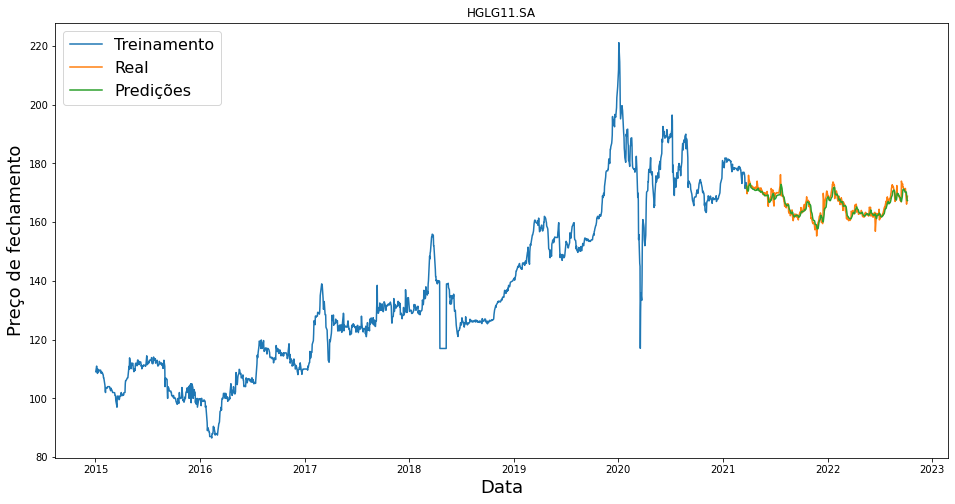

In [220]:
plt.figure(figsize =(16, 8))
plt.title(acao)
plt.xlabel('Data', fontsize = 18)
plt.ylabel("Preço de fechamento", fontsize = 18)
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()

In [221]:
df_teste.sort_index()

df_teste

,Close,predicoes
Date,,
2021-03-24,171.979996,172.350311
2021-03-25,170.539993,171.878998
2021-03-26,169.699997,171.247131
2021-03-29,172.000000,170.553467
2021-03-30,172.899994,170.622253
...,...,...
2022-10-03,167.500000,170.292786
2022-10-04,166.149994,169.410828
2022-10-05,167.029999,168.193832


In [222]:
#o preço é legal, mas o importante é acertar pra qual mercado o lado vai. Sera q isso foi feito?

#calcular media de acertos e expectativa de lucro

df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste = df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, 
                                                      True, False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0, 
                                                      True, False)

df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero']
                                      , True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
Date,,,,,,,,
2021-03-25,170.539993,171.878998,-0.008373,-0.002735,False,False,True,0.008373
2021-03-26,169.699997,171.247131,-0.004926,-0.003676,False,False,True,0.004926
2021-03-29,172.000000,170.553467,0.013553,-0.004051,True,False,False,0.013553
2021-03-30,172.899994,170.622253,0.005233,0.000403,True,True,True,0.005233
2021-03-31,175.990005,171.102158,0.017872,0.002813,True,True,True,0.017872
...,...,...,...,...,...,...,...,...
2022-10-03,167.500000,170.292786,-0.023324,0.000587,False,True,False,0.023324
2022-10-04,166.149994,169.410828,-0.008060,-0.005179,False,False,True,0.008060
2022-10-05,167.029999,168.193832,0.005296,-0.007184,True,False,False,0.005296


In [223]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
errou_lado = 1 - acertou_lado

media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()

exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado

ganho_sobre_perda = media_lucro[1]/media_lucro[0]

print(media_lucro)
print(ganho_sobre_perda)
print(acertou_lado)
print(exp_mat_lucro * 100)

acertou_o_lado
False    0.005705
True     0.004960
Name: variacao_percentual_acao_abs, dtype: float64
0.8695373324075734
0.5
-0.03721271945665732


In [224]:
#criando um código que você passa 60 dias e ele devolve a cotação
#resumindo: vamos descobrir o preço da petrobras de hoje/amanha com esse modelo

data_hoje = datetime.now()

#se quiser escolher um dia, basta fazer assim

data_hoje = datetime.now() - timedelta(days = 1)

if data_hoje.hour > 18:
    
    final = data_hoje
    inicial = datetime.now() - timedelta(days = 252)
    
else:
    final = data_hoje - timedelta(days = 1)
    inicial = datetime.now() - timedelta(days = 252)
    
#nao vai botar outra ação aqui hein kkkkkkkk
cotacoes = pdr.get_data_yahoo(acao, inicial, final) 
ultimos_60_dias = cotacoes['Close'].iloc[-60:].values.reshape(-1, 1)

ultimos_60_dias_escalado = escalador.transform(ultimos_60_dias)

teste_x = []
teste_x.append(ultimos_60_dias_escalado)
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

previsao_de_preco = modelo.predict(teste_x)
previsao_de_preco = escalador.inverse_transform(previsao_de_preco)

print(previsao_de_preco)

1/1 [==============================] - 0s 80ms/step
[[167.37236]]


# Sugestões:
<br>

- Melhorar as estatísticas de avaliação (dias seguidos ganhando, max DD, etc)
<br>

- Rodar pra todas as ações do ibovespa e criar uma expectativa matemática da expectativa matemática. Isso vai deixar o resultado final ainda mais robusto, definando a aloção do $ basedo na liquidez


In [225]:
dados_acao

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,109.099998,103.000000,107.000000,109.099998,500.0,101.408676
2015-01-05,113.699997,109.000000,110.000000,111.000000,2320.0,103.174721
2015-01-06,110.989998,110.000000,110.988998,110.000000,280.0,102.245224
2015-01-07,111.198997,108.000000,109.000000,109.000000,2460.0,101.315727
2015-01-08,109.999001,107.000000,109.999001,108.500000,1300.0,100.850967
...,...,...,...,...,...,...
2022-10-03,170.000000,167.149994,170.000000,167.500000,62455.0,167.500000
2022-10-04,167.449997,163.500000,167.419998,166.149994,97568.0,166.149994
2022-10-05,167.910004,165.100006,166.149994,167.029999,57944.0,167.029999
